# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Finding duplicate mice by ID number that shows up for both Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Getting all the data for the duplicate mouse ID 'g989'
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Dropping the duplicate mouse by its ID 'g989'
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Displaying the first few rows of the clean DataFrame
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of unique mice in the clean DataFrame
number_of_mice_clean = clean_data['Mouse ID'].nunique()
number_of_mice_clean


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# group the data by 'Drug Regimen'
grouped_regimen = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Recalculating the summary statistics with full column titles and without rounding
summary_stats_full = pd.DataFrame({
    "Mean Tumor Volume": grouped_regimen.mean(),
    "Median Tumor Volume": grouped_regimen.median(),
    "Tumor Volume Varience": grouped_regimen.var(),
    "Tumor Volume Std Dev": grouped_regimen.std(),
    "Tumor Volume Std. Err": grouped_regimen.sem()
})

summary_stats_full



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Using the aggregation method to generate the summary statistics in a single line
advanced_summary_stats = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Renaming the columns for clarity
advanced_summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 
                                  'Tumor Volume Standard Deviation', 'Tumor Volume SEM']

advanced_summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

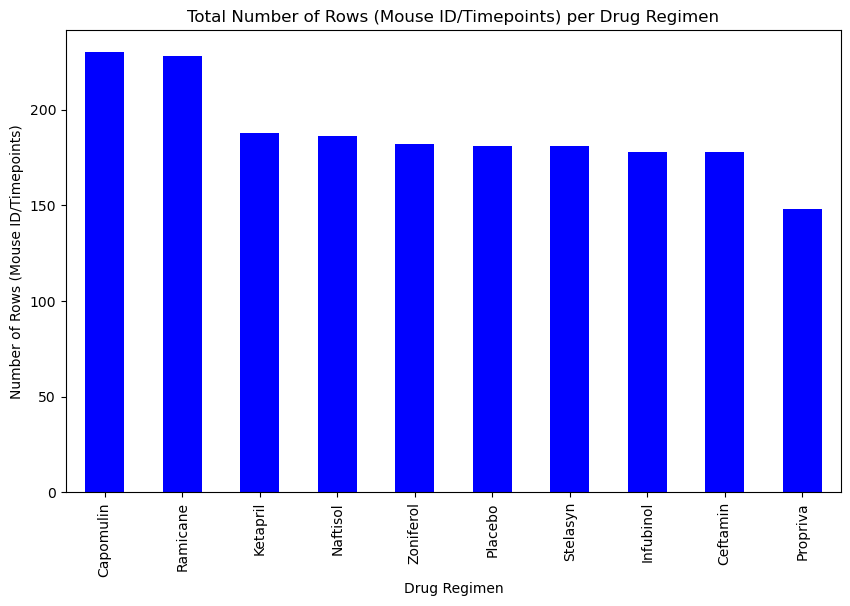

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Counting the total number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_count = clean_data['Drug Regimen'].value_counts()

# Generating a bar plot using Pandas
regimen_count_plot = regimen_count.plot(kind='bar', figsize=(10,6), color='blue', title='Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
regimen_count_plot.set_xlabel("Drug Regimen")
regimen_count_plot.set_ylabel("Number of Rows (Mouse ID/Timepoints)")

plt.show()


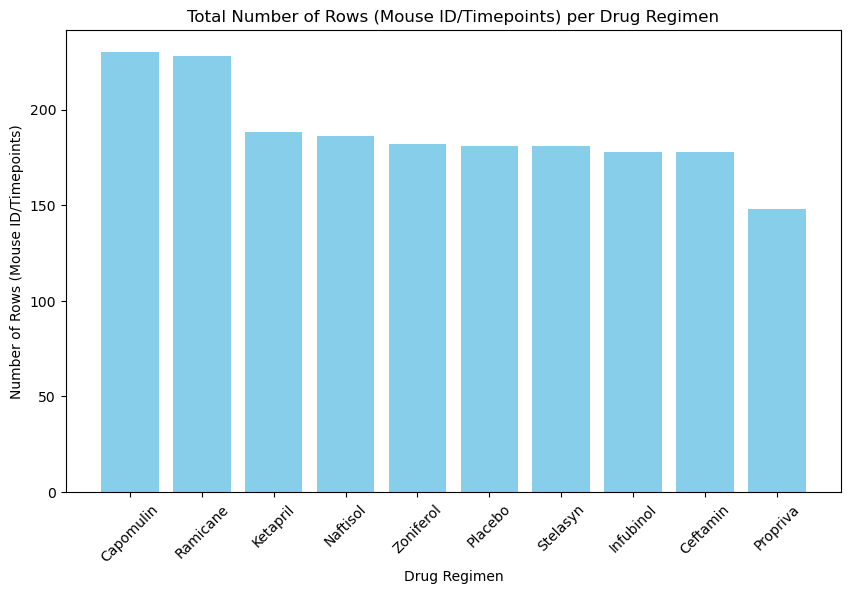

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generating a bar plot using pyplot
plt.figure(figsize=(10,6))
plt.bar(regimen_count.index, regimen_count.values, color='skyblue')
plt.title('Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()


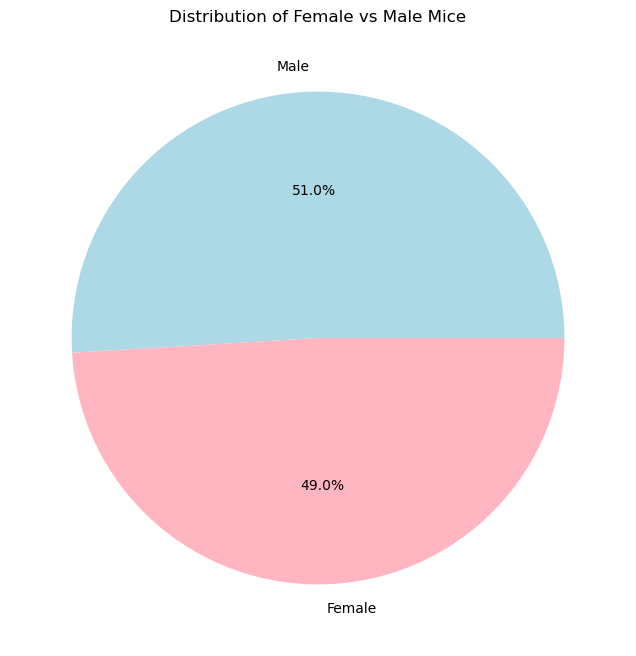

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Counting the distribution of female versus male mice
sex_distribution = clean_data['Sex'].value_counts()

# Generating a pie plot using Pandas
sex_distribution_plot = sex_distribution.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', colors=['lightblue', 'lightpink'], title='Distribution of Female vs Male Mice')
sex_distribution_plot.set_ylabel('')

plt.show()


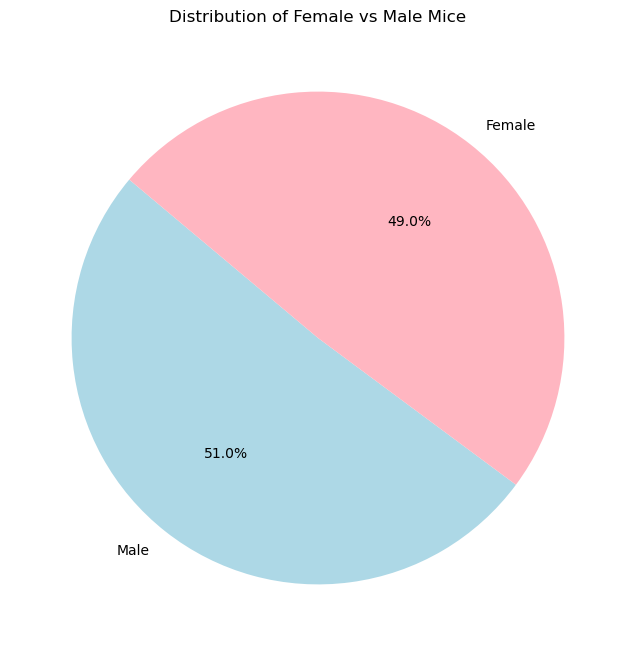

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generating a pie plot using pyplot
plt.figure(figsize=(8,8))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filtering the data for the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [17]:
import numpy as np

# Putting treatments into a list for the for loop and for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating empty list to fill with tumor vol data for plotting
tumor_vol_data = []

# Calculating the IQR and determining potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merged_data[merged_data['Drug Regimen'] == treatment]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

    # Calculating the IQR
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s lower bound: {lower_bound}, upper bound: {upper_bound}. Potential outliers: {outliers.values}")

tumor_vol_data


Capomulin's lower bound: 20.70456164999999, upper bound: 51.83201549. Potential outliers: []
Ramicane's lower bound: 17.912664470000003, upper bound: 54.30681135. Potential outliers: []
Infubinol's lower bound: 36.83290494999999, upper bound: 82.74144559000001. Potential outliers: [36.3213458]
Ceftamin's lower bound: 25.355449580000002, upper bound: 87.66645829999999. Potential outliers: []


[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

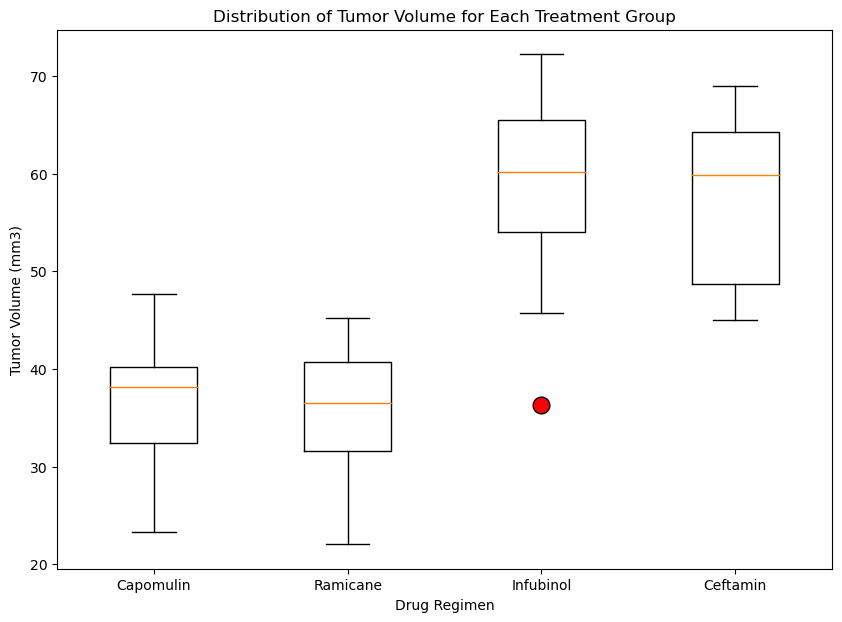

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Generating a box plot for the distribution of the tumor volume for each treatment group
plt.figure(figsize=(10,7))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none'))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()


## Line and Scatter Plots

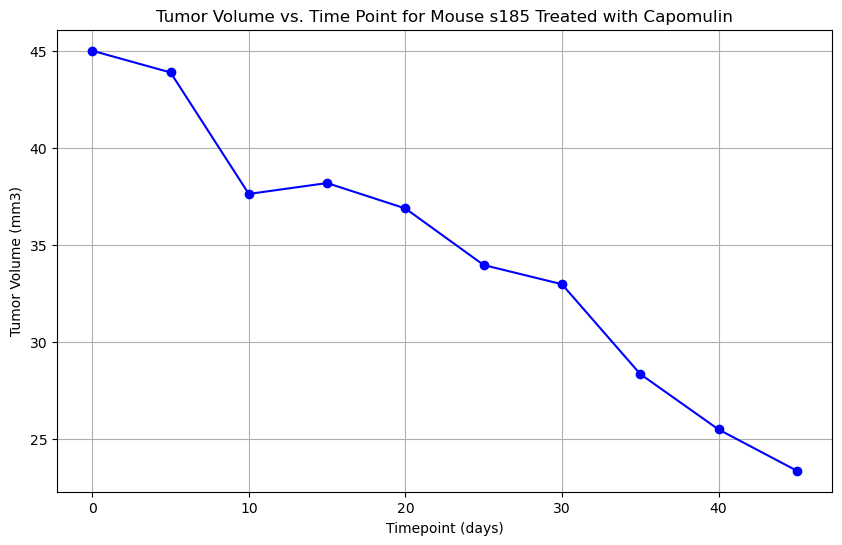

In [19]:
# Selecting a single mouse treated with Capomulin for the line plot
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]  # Choosing the first mouse ID from the Capomulin dataset

# Filtering data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generating a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', markersize=6)
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()



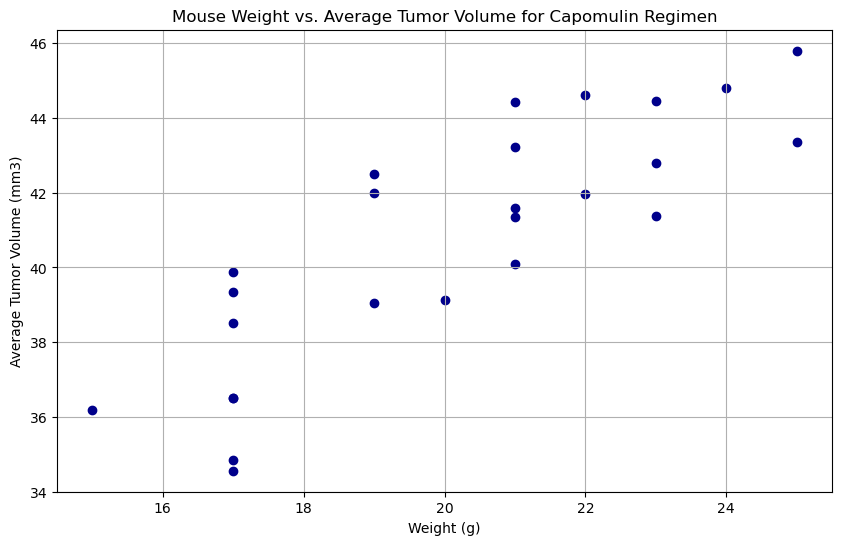

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Grouping Capomulin data by Mouse ID and calculating the average tumor volume
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Generating a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10,6))
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'], color='darkblue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is: 0.84


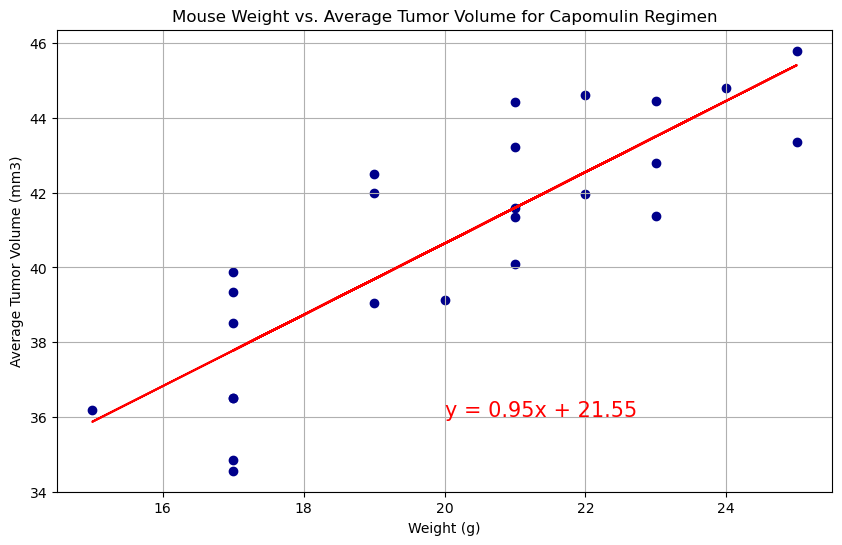

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculating the correlation coefficient
correlation = capomulin_grouped['Weight (g)'].corr(capomulin_grouped['Tumor Volume (mm3)'])

# Performing linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
regress_values = capomulin_grouped['Weight (g)'] * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Printing the correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation:.2f}")

# Plotting the scatter plot with the linear regression model
plt.figure(figsize=(10,6))
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'], color='darkblue')
plt.plot(capomulin_grouped['Weight (g)'], regress_values, "r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.grid(True)
plt.show()
